In [1]:
from collections import defaultdict 
import pydot
import statistics
import os
import sys
import csv
import random
from IPython.display import Image, display
from matplotlib import pyplot as plt


In [2]:
path = "/home/achilleas/Desktop/thesis/DATASET F1/Fold_1/20%_test"
pathB = "/home/achilleas/Desktop/thesis/DATASET F1/specimen_benign/20%_test"

filename = "CVGB"
grgFilename = "default_G'"
mapFilename = "default_unique_mapping"
rootDir = [os.path.join(root, name)
             for root, dirs, files in os.walk(path)
             for name in files
             if name.endswith(filename+".csv")]
rootDir.sort()
benignDir = [os.path.join(root, name)
             for root, dirs, files in os.walk(pathB)
             for name in files
             if name.endswith(filename+".csv")]
benignDir.sort()
grgDir = [os.path.join(root,name)
             for root, dirs, files in os.walk(path)
             for name in files
             if name.endswith(grgFilename+".txt")]


In [3]:
classes = {"ACCESS_MASK":0,"Atom":1,"BOOLEAN":2,"Debug":3,"Device":4,
                                 "Environment":5,"File":6,"HANDLE":7,"Job":8,"LONG":9,"LPC":10,
                                 "Memory":11,"NTSTATUS":12,"Object":13,"Other":14,"PHANDLE":15,
                                 "PLARGE_INTEGER":16,"Process":17,"PUNICODE_STRING":18,
                                 "PULONG":19,"PULARGE_INTEGER":20,"PVOID_SIZEAFTER":21,
                                 "PWSTR":22,"Registry":23,"Security":24,"Synchronization":25,
                                 "Time":26,"Transaction":27,"ULONG":28,"WOW64":29, "DummyStart":30,"DummyEnd":31}

In [4]:
# Python program for implementation of Ford Fulkerson algorithm 


#This class represents a directed graph using adjacency matrix representation 
class Graph: 

    def __init__(self,graph): 
        self.graph = graph # residual graph 
        self. ROW = len(graph) 
        #self.COL = len(gr[0]) 
        

    '''Returns true if there is a path from source 's' to sink 't' in 
    residual graph. Also fills parent[] to store the path '''
    def BFS(self,s, t, parent): 

        # Mark all the vertices as not visited 
        visited =[False]*(self.ROW) 
        
        # Create a queue for BFS 
        queue=[] 
        
        # Mark the source node as visited and enqueue it 
        queue.append(s) 
        visited[s] = True
        
        # Standard BFS Loop 
        while queue: 

            #Dequeue a vertex from queue and print it 
            u = queue.pop(0) 

            # Get all adjacent vertices of the dequeued vertex u 
            # If a adjacent has not been visited, then mark it 
            # visited and enqueue it 
            for ind, val in enumerate(self.graph[u]): 
                if visited[ind] == False and val > 0 : 
                    queue.append(ind) 
                    visited[ind] = True
                    parent[ind] = u 

        # If we reached sink in BFS starting from source, then return 
        # true, else false 
        return True if visited[t] else False


    # Returns tne maximum flow from s to t in the given graph 
    def FordFulkerson(self, source, sink): 

        # This array is filled by BFS and to store path 
        parent = [-1]*(self.ROW) 

        max_flow = 0 # There is no flow initially 

        # Augment the flow while there is path from source to sink 
        while self.BFS(source, sink, parent) : 

            # Find minimum residual capacity of the edges along the 
            # path filled by BFS. Or we can say find the maximum flow 
            # through the path found. 
            path_flow = float("Inf") 
            s = sink 
            while(s != source): 
                path_flow = min (path_flow, self.graph[parent[s]][s]) 
                s = parent[s] 

            # Add path flow to overall flow 
            max_flow += path_flow 

            # update residual capacities of the edges and reverse edges 
            # along the path 
            v = sink 
            while(v != source): 
                u = parent[v] 
                self.graph[u][v] -= path_flow 
                self.graph[v][u] += path_flow 
                v = parent[v] 
#         print ("max flow is: "+str(max_flow))
        return max_flow


# # Create a graph given in the above diagram 

# graph = [[0, 16, 13, 0, 0, 0], 
# 		[0, 0, 10, 12, 0, 0], 
# 		[0, 4, 0, 0, 14, 0], 
# 		[0, 0, 9, 0, 0, 20], 
# 		[0, 0, 0, 7, 0, 4], 
# 		[0, 0, 0, 0, 0, 0]] 

# g = Graph(graph) 

# source = 0; sink = 5

# print ("The maximum possible flow is %d " % g.FordFulkerson(source, sink)) 

# #This code is contributed by Neelam Yadav 


In [5]:
def getSourceSink(path):
    verteces = []
    with open(path) as fp:
        line = fp.readline()
        while line:
            verteces.append(line.split(","))
            line = fp.readline()
    return [verteces[0][0],verteces[-1][1].strip()]

In [6]:
def getArray (path):
    results = []
    with open(path) as csvfile:
        reader = csv.reader(csvfile,csv.QUOTE_NONNUMERIC) # change contents to floats
        for row in reader: # each row is a list
            nums = []
            for i in row: 
                if i :
                    nums.append(int(i))
            results.append(nums)
    return results

In [7]:
def createExtendedG(g):
    parents = []
    children = []
    for i in range(len(g)):
        for j in range(len(g[i])):
            if g[i][j]!=0:
                break
            else:
                children.append(i)
    for i in range(len(g)):
        for j in range(len(g[i])):
            if g[j][i]!=0:
                break
            else:
                parents.append(i)
                
    for i in range(len(g)):
        g[i].append(0)
        g[i].append(0)
    leng= len(g)
    g.append([0 for i in range (leng+2)])
    g.append([0 for i in range (leng+2)])
    
    for i in children :
        g[i][-1] = 1
    for j in parents:
        g[-2][j]=1
#     maxDegV= findMaxOutDegreeVertex(g)
#     minDegV = findMaxInDegreeVertex(g)
#     print(maxDegV)
#     print(minDegV)
#     for l in minDegV:
#         children.append(l[0])
#     for h in maxDegV:
#         parents.append(h[0])
#     for i in range(len(g)):
#         g[i].append(0)
#         g[i].append(0)
#     g.append([0 for i in range (len(g)+2)])
#     g.append([0 for i in range (len(g)+1)])
#     x,y = len(g),len(g[0])
#     for p in parents:
#         g[x-2][p] =1
#     for c in children:
#         g[c][x-1]= 1
    return g

In [8]:
def createImage(g,path):
    G = pydot.Dot(graph_type='digraph')
    for i in range(len(g)):
        x = pydot.Node(i)
        for j in range(len(g[i])):
            if g[i][j]!= 0 :
                y = pydot.Node(j)
                e = pydot.Edge(i,j)
                G.add_edge(e)
                
    im = Image(G.create_png())
    G.write_png(path)
    display(im)             

In [9]:
def findMaxOutDegreeVertex(g):
    outDegrees={}
    return_matrix = []
    for i in range(len(g)):
        for j in range(len(g[i])):
            if g[i][j]!=0:
                if i not in outDegrees:
                    outDegrees[i]=[g[i][j],1]
                else: 
                    weight = outDegrees[i][0]+g[i][j]
                    cardinality = outDegrees[i][1]+1
                    outDegrees[i]=[weight,cardinality]
    return outDegrees
    
#     sorted_deg = sorted(outDegrees.items(), key=lambda kv: kv[1])
#     return_matrix.append([sorted_deg[0]])
#     return_matrix.append([sorted_deg[-1]])
#     for d in range(1, len(sorted_deg)-1):
#         if sorted_deg[0][1] == sorted_deg[d][1]:
#             return_matrix[0].append(sorted_deg[d])
#     for h in range(len(sorted_deg)-2, 0 , -1):
#         if sorted_deg[-1][1] == sorted_deg[h][1]:
#             return_matrix[1].append(sorted_deg[h])
#     return return_matrix[1]
    

In [10]:
def findMaxInDegreeVertex(g):
    inDegrees= {}
    return_matrix = []
    for i in range (len(g)):
        for j in range(len(g[i])):
            if g[j][i]!=0:
                if i not in inDegrees:
                    inDegrees[i] = [g[j][i],1]
                else: 
                    weight = inDegrees[i][0]+g[j][i]
                    cardinality = inDegrees[i][1]+1
                    inDegrees[i]=[weight,cardinality]
                    
    return inDegrees    
#     sorted_deg = sorted(inDegrees.items(), key=lambda kv: kv[1][1])
#     return_matrix.append([sorted_deg[0]])
#     return_matrix.append([sorted_deg[-1]])
    
#     for d in range(1, len(sorted_deg)-1):
#         if sorted_deg[0][1] == sorted_deg[d][1]:
#             return_matrix[0].append(sorted_deg[d])
#     for h in range(len(sorted_deg)-2, 0 , -1):
#         if sorted_deg[-1][1] == sorted_deg[h][1]:
#             return_matrix[1].append(sorted_deg[h])
#     return return_matrix[1]


In [11]:
def executeTrial(path):
    sp_path = path.split('/')
    sp_path[-1] = 'FF_in_defaultG.csv'
    family = sp_path[-3]
    write_path = '/'.join(sp_path)
    g = Graph(getArray(path)) 
    sp_path[-1]= "default_G'.txt"
    source = 30
    sink = 31
#     print("family %s/%s with source %d sink %d" %(sp_path[-3],sp_path[-2],source,sink))
    fG = g.FordFulkerson(source,sink)
    return [fG, family]
#     sp_path[-1] = 'G_image.png'
#     createImage(getArray(path),'/'.join(sp_path))
#     print ("The maximum possible flow is %d " % g.FordFulkerson(source, sink))
#     print ("the max flow graph is: ")
#     sp_path[-1] = 'FF_G_image.png'
#     createImage(fG,'/'.join(sp_path))
#     with open(write_path, mode='w') as ff:
#         ff_writer = csv.writer(ff, delimiter=',')
#         for i in fG:
#             ff_writer.writerow(i)
        

In [12]:
def createCoverageGraph(g):
    cvg = []
    combinedDegrees = {}
    inDegrees = findMaxInDegreeVertex(g)
    inKeys =list(inDegrees.keys())
    outDegrees = findMaxOutDegreeVertex(g)
    outKeys =list(outDegrees.keys())
    combinedDegrees= outDegrees.copy()
    for i in inKeys:
        if i in outDegrees:
            combinedDegrees[i] = [inDegrees[i][0]+outDegrees[i][0], inDegrees[i][1]+outDegrees[i][1]]
        else : 
            combinedDegrees[i] = inDegrees[i]
    sortedcDegrees = sorted(combinedDegrees.items(), key = lambda kv:kv[0])     
    cKeys = [i[0] for i in sortedcDegrees]
    for i in range(30):
        row = [0 for k in range(30)]
        if i not in cKeys:
            cvg.append(row)
            continue
        weight = combinedDegrees[i][0]
        cardinality = combinedDegrees[i][1]
        for j in cKeys:
            if weight > combinedDegrees[j][0] and cardinality > combinedDegrees[j][1]:
                row[j] = 1
        cvg.append(row)
        
    
#     print("combo")
#     print(combinedDegrees)
#     print("---------------------------------")
#     print ("in degrees [w,c]")
#     print(inDegrees)
#     print("out degrees [w,c]")
#     print(outDegrees)
#     print("=================================")
#     print(inKeys)
#     print(outKeys)
#     print(cKeys)
    
    
    
#     sorted_deg = sorted(outDegrees.items(), key=lambda kv: kv[1][0],reverse = True)
#     for i in range(len(outDegrees)):
#         parent = sorted_deg[i][0]
#         print(parent)
#         weight = outDegrees[parent][0]
#         cardinality = outDegrees[parent][0]
#         row = [0 for i in range(len(outDegrees))]
# #         print(outDegrees[i])
#         for j in range(i,len(outDegrees)):
#             if outDegrees[j][0] < weight :
#                 row[j] = 1
#         cvg.append(row)
    return cvg
    

In [13]:
def writeCSV(g,path,name):
    path_spl = path.split('/')
    path_spl[-1] = name
    sp_path = '/'.join(path_spl)
    with open(sp_path, mode='w') as cvg_file:
        cvg_writer = csv.writer(cvg_file, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
        for i in g:
            cvg_writer.writerow(i)

ABU,Banload,  22
Agent,Agent,  24.0
Agent,Small,  19
Allaple,RAHack,  18.0
Ardamax,Ardamax,  24
BDH,Small,  18
BGM,Delf,  17
Bactera,VB,  20.0
Banbra,Banker,  19.5
Bancos,Banker,  22
Banker,Banker,  19
Banker,Delf,  20.0
Banload,Banker,  18
Bifrose,CEP,  18
Bobax,Bobic,  17
DKI,PoisonIvy,  22
DNSChanger,DNSChanger,  18.0
Downloader,Agent,  18
Downloader,Delf,  18.5
Downloader,VB,  20
Gaobot,Agobot,  18.0
Gobot,Gbot,  18.0
Horst,CMQ,  19.0
Hupigon,ARR,  18
Hupigon,AWQ,  19.0
IRCBot,Sdbot,  18
LdPinch,LDPinch,  18
Lmir,LegMir,  20
Mydoom,Mydoom,  21
Nilage,Lineage,  21
OnLineGames,LegMir,  21
OnLineGames,Mmorpg,  20.0
OnLineGames,OnlineGames,  18
OnlineGames,Delf,  18.5
Parite,Pate,  18.0
Plemood,Pupil,  19.0
PolyCrypt,Swizzor,  22
Prorat,AVW,  18.0
Rbot,Sdbot,  21.0
SdBot,Sdbot,  19.5
Small,Downloader,  18.0
Stration,Warezov,  18.0
Swizzor,Obfuscated,  19
VS,INService,  17
Viking,HLLP,  24.0
Virut,Virut,  20
Zhelatin,ASH,  18
Zlob,Puper,  19
Adobe_Reader,Adobe_Reader  19
Apple_Software_

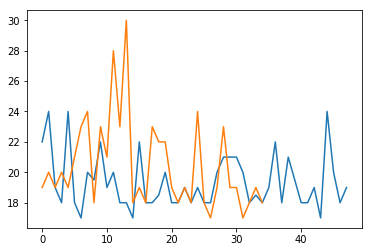

In [15]:
max_flow_vals={}
mean_max_flow={}
mean_flows = []
max_flow_valsB={}
mean_max_flowB={}
mean_flowsB = []
for i in rootDir:
    values= executeTrial(i)
    if values[1] in max_flow_vals:
        max_flow_vals[values[1]].append(values[0])
    else : 
        max_flow_vals[values[1]]= [values[0]]
        

for i in max_flow_vals:
    mean_max_flow[i] = statistics.median(max_flow_vals[i])
# print (mean_max_flow)
for i in mean_max_flow :
    mean_flows.append(mean_max_flow[i])
    print(str(i)+ "  " + str(mean_max_flow[i]))
    
    
for i in benignDir:
    valuesB= executeTrial(i)
    if valuesB[1] in max_flow_valsB:
        max_flow_valsB[values[1]].append(values[0])
    else : 
        max_flow_valsB[valuesB[1]]= [valuesB[0]]
        

for i in max_flow_valsB:
    mean_max_flowB[i] = statistics.median(max_flow_valsB[i])
# print (mean_max_flow)
for i in mean_max_flowB :
    mean_flowsB.append(mean_max_flowB[i])
    print(str(i)+ "  " + str(mean_max_flowB[i]))
lists = [mean_flows,mean_flowsB]
for i in lists:
    plt.plot(i)
plt.show()
#---------------------------------------------------
# executeTrial(rootDir[0])
# ar = [[0,1,1,1,1],
#       [0,0,0,1,1],
#       [0,0,0,1,1],
#       [0,0,0,0,1],
#       [0,0,0,0,0]]
# createExtendedG(ar)
# cvg = createCoverageGraph(getArray(rootDir[0]),rootDir[0])

# for i in rootDir:
#     writeCSV(createExtendedG(createCoverageGraph(getArray(i))),i, 'CVGB.csv')
# for i in cvg:
#     print(i)
# g = createExtendedG(ar)
# G = pydot.Dot(graph_type='digraph')
# for i in range(len(g)):
#     x = pydot.Node(i)
#     for j in range(len(g[i])):
#         if g[i][j]!= 0 :
#             y = pydot.Node(j)
#             e = pydot.Edge(i,j)
#             G.add_edge(e)
                
# im = Image(G.create_png())
# display(im)             